### 6409035646 เอกลักษณ์ สุขุมาลพงศ์กุล

github linkl: https://github.com/ekkalaks/CS652_Applied-Machine-Learning

# Assignment 2 - Regression

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. 


# Question0: 

Set up the variables needed for later sections.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


Visualize the dataset

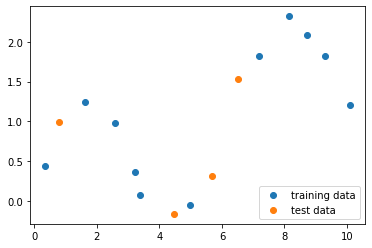

In [2]:
import matplotlib.pyplot as plt    
    
plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);
    

# Question 1

Write a code segment that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

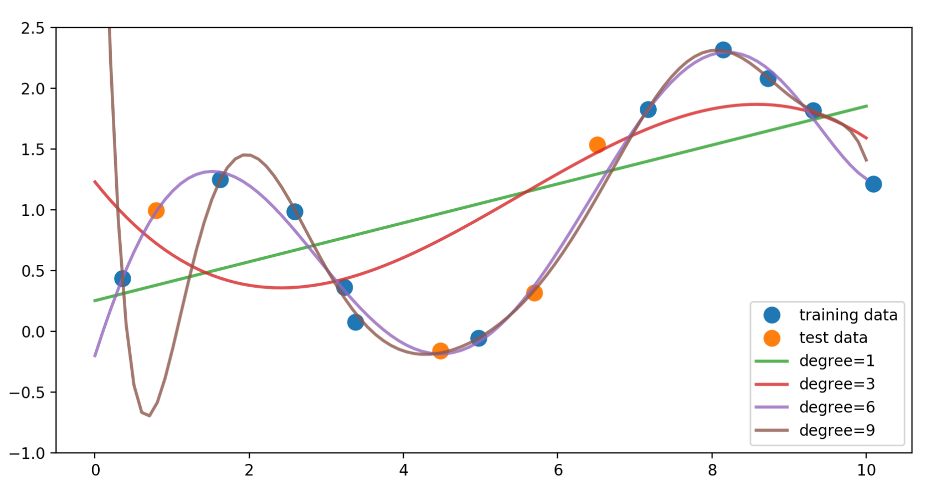

The figure above shows the fitted models plotted on top of the original data.

<br>
*This code segment should return a numpy array (degree_depreciations) filled with scores (poly degree 1,3,6,9) with shape `(4, 100)`*

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# degree_predictions = np.zeros((4,100)) 
degree_predictions = []


######################################################################
# Your code here
#######################################################################

for i, degree in enumerate([1,3,6,9]): # loop for predict
  poly = PolynomialFeatures(degree=degree) # assign polynomial features by degree = [1,3,6,9]
  X_poly = poly.fit_transform(X_train.reshape(11,1)) # fit transform model by reshape X_train(11,1)
  clf = LinearRegression().fit(X_poly, y_train) # fit LinearReg Model
  y_poly = clf.predict(poly.fit_transform(np.linspace(0,10,100).reshape(100,1))); # predict y
  degree_predictions.append(y_poly) # append result to degree_prediction list

#######################################################################

Plot the training and testing scores for each degree (the plot should be the same as above)

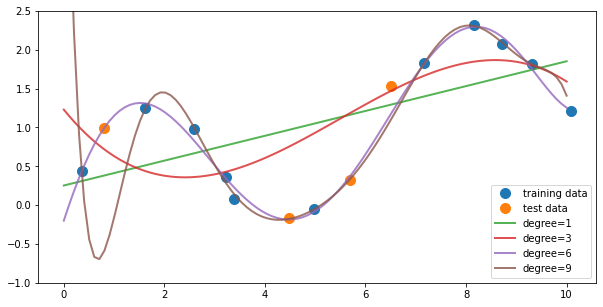

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
for i,degree in enumerate([1,3,6,9]):
  plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
  plt.ylim(-1,2.5)
  plt.legend(loc=4)


# Question 2

Write a code segment that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data (r2_train) as well as the the test data (r2_test). Both r2_train and r2_test are numpy arrays , each of which should have shape `(10,)`*

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

r2_train = np.zeros(10)
r2_test = np.zeros(10)
    
# Your code here
for degree in range(10): # for loop degree 0-9
  poly = PolynomialFeatures(degree=degree) 
  X_poly = poly.fit_transform(X_train.reshape(11,1))
  clf = LinearRegression().fit(X_poly, y_train)
  r2_train[degree] = clf.score(X_poly, y_train)
  X_test_poly = poly.fit_transform(X_test.reshape(4,1))
  r2_test[degree] = clf.score(X_test_poly, y_test)


Text(0, 0.5, 'Score (R^2)')

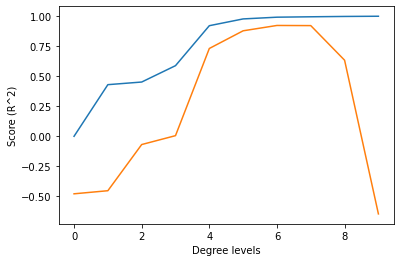

In [6]:
#plot Score(R^2) compare with degree levels
import matplotlib.pyplot as plt
np.arange(0, 10)
degrees = np.arange(0, 10)
plt.figure()
plt.plot(degrees, r2_train, degrees, r2_test)
plt.xlabel("Degree levels")
plt.ylabel("Score (R^2)")

### Question 3



Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 



*There might be multiple correct solutions, however, you only need to return one possible solution, for example, (1,2,3).* 

In [7]:
# Your code is here
def answer_three():
  return (0, 9, 6)

answer_three() #(Underfitting, Overfitting, Good_Generalization)

(0, 9, 6)

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import r2_score

# Your code is here
def answer_four():
  poly = PolynomialFeatures(12) # assign polynomail features of degree = 12
  #Shape Polynomial Features
  X_poly = poly.fit_transform(X_train.reshape(11,1))
  X_test_poly = poly.fit_transform(X_test.reshape(4,1))
  #Linear Regression
  linreg = LinearRegression().fit(X_poly, y_train)
  lin_r2_test = linreg.score(X_test_poly, y_test)
  #Lasso Regression
  linlasso = Lasso(alpha=0.01, max_iter = 10000). fit(X_poly, y_train)
  las_r2_test = linlasso.score(X_test_poly, y_test)

  return (lin_r2_test, las_r2_test)

answer_four()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e-01, tolerance: 6.895e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(-4.312001797497546, 0.8406625614750236)